# MATH 360 Problem Set 3a

## Stochastic Models

## Montel Carlo Exercises

The following problems centre around coding a monte carlo method to solve a specific problem.

### Calculation of $\pi$ using Monte Carlo
Use Monte Carlo to calculate $\pi$. To do this, use the following framework:
1. Create a square on the interval $[-1,1] \times [-1,1]$ and inscribe a circle with radius 1 inside.
2. Uniformly scatter a chosen number of points over the entire square. 
3. Count the number of points inside the circle.
4. Compute the ratio of the points inside to the total number of points distributed.
5. Multiply the result of step 4 by 4 to estimate $\pi$.

*This methodology is from Monte Carlo Methods by Malvin Kalos and Paula Witlock*

In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [27]:
# sample one random point inside a circle with radius 1

inside_circle = []

def pi_mc(N):
    for i in range(N):
        x = np.random.uniform(-1, 1, size=1)
        y = np.random.uniform(-1, 1, size=1)
        if x**2 + y**2 <= 1:
            inside_circle.append(1)
        else:
            inside_circle.append(0)
    
    return 4* sum(inside_circle) / N

    

In [28]:
pi_mc(100000)

3.14996

In [29]:
f = lambda x: x*np.sin(x)
integ, err = sp.integrate.quad(f, 0, np.pi)
integ

3.141592653589793

### Monte Carlo Integration

Recall the average value of a function formula: $$\bar{f}(x) = \frac{1}{b-a} \int\limits_a^b f(x) dx.$$  We are implementing integration using a numerical method.  We can rearrange this formula to get an exact definition $$ \int\limits_a^b f(x) dx = (b-a)\bar{f}(x).$$

To numerically compute the integral, we will be taking our function $f(x)$ and evaluating it over a uniform grid of $x$ points, say $x_i$.  If we take the limit of the space between $x_i$ and $x_{i+1}$ to zero, we would end up with our exact integral.  However, when working with numerical schemes, we have a discrete number of $x_i$.  

Going back to our formulation, we can calculate the average of the $f(x_i)$'s to approximate the integral: $$ \int\limits_a^b f(x) dx \approx (b-a) \left(\frac{1}{N} \sum\limits_{i=1}^{N} f(x_i) \right).$$

If we take $N$ big enough, by the Law of Large Numbers, our estimate of $$(b-a) \left(\frac{1}{N} \sum\limits_{i=1}^{N} f(x_i)\right)$$ will converge to $$(b-a)\bar{f}(x),$$ which we know by the average value formula is equal to $\int\limits_a^b f(x) dx$.

Set up a Monte Carlo framework compute the integral $\int\limits_0^{\pi} x\sin(x) \, dx$ and then compare your result to the exact value of $\int\limits_0^{\pi} x\sin(x) \, dx = \pi.$

**Remark:** For small dimensional integrals (e.g., $d=1, d=2, d=3$) we have some good quadrature methods to solve integrals.  However, as the dimension of the integrand increases, these methods become more and more computational expensive to implement.  The convergence rate of quadrature algorithms goes as $N^d$.  So as $d$ increases, we need more and more sample points to achieve a good accuracy. In other words, as we increase the number of points in the region by creating a finer grid spacing, the error does not decrease at the same rate. For higher dimensional integrals, the technique of Monte Carlo Integration is used, because the error has a constant decrease of $\mathcal{O}\left( \frac{1}{\sqrt{N}} \right).$

## Probability Distribution Problems

For each problem below, construct a mathematical model using the 6 step modelling process.  Be sure to **explicitly** indicate each step of the proccess.

### Switchboard calls

Suppose that telephone calls arriving at a particular switchboard follow an exponential distribution, with an average of $5$ calls per minute. Further suppose that calls are transferred to their destination by the switchboard following a uniform distribution spanning $30$ seconds to $50$ seconds.  

Construct a mathematical model to model the total call time from when a call enters the switchboard to when it is transferred to its destination. Then form the probability distribution function using Kernel Density Estimation.

Be sure to follow the modelling process in your solution. 

**Problem Statement**

Find the distribution of the total call time from when the call enters and when it is transferred using a KDE.

**Variables & Parameters**
- $X_1$, time for telephone to arrive at a switchboard, random variable
- $X_2$, time for call to be transferred to destination, random variable
- $Y$, the total time for a call to reach its destination
- $\mu_1$, average time for call to arrive at switchboard
- $\sigma_1^2$, variance of time for call to reach switchboard
- $\mu_2$, average time for call to reach destination
- $\sigma_2^2$, variance of time for call to reach switchboar

**Assumptions & Constraints**
- Average incoming call is 5 calls per minute
- Telephone calls arriving follow an exponential distribution
- Calls transferred follow an uniform distribution from 30 seconds to 50 seconds


**Build Solutions**

(array([0.00271702, 0.0199248 , 0.02264181, 0.02083047, 0.02717018,
        0.03441556, 0.0362269 , 0.03803825, 0.04437795, 0.04075526,
        0.05343468, 0.05252901, 0.06158573, 0.04528363, 0.05524602,
        0.04890632, 0.04890632, 0.04256661, 0.04347228, 0.02898152,
        0.03169854, 0.02264181, 0.01449076, 0.01267942, 0.0099624 ,
        0.00815105, 0.00633971, 0.00543404, 0.00543404, 0.00452836,
        0.00090567, 0.00271702, 0.00090567, 0.00543404, 0.00090567,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00090567, 0.00090567, 0.00090567, 0.        , 0.        ,
        0.00090567, 0.        , 0.        , 0.        , 0.00181135]),
 array([30.40397158, 31.50812343, 32.61227528, 33.71642712, 34.82057897,
        35.92473082, 37.02888267, 38.13303452, 39.23718636, 40.34133821,
        41.44549006, 42.54964191, 43.65379375, 44.7579456 , 45.86209745,
        46.9662493 , 48.07040114, 49.17455299, 50.27870484, 51.38285669,
        52.48700853, 53.59

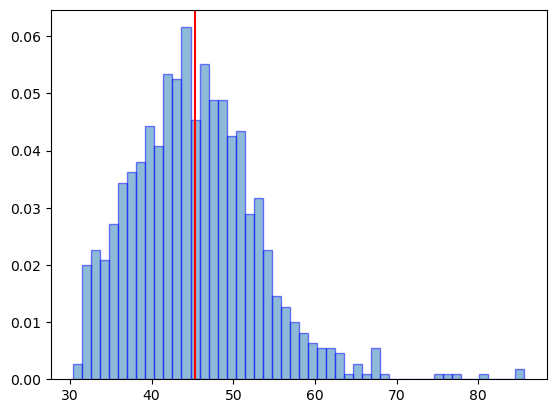

In [33]:
N = 1000
X1 = np.random.exponential(scale=5, size=N)
X2 = np.random.uniform(low=30, high=50, size=N)
Y = X1 + X2

mu_Y = np.mean(Y)

plt.axvline(mu_Y, color='red')
plt.hist(Y, bins=50, density=True, alpha=0.5, edgecolor='blue')

(array([0.00689863, 0.01773935, 0.01872487, 0.02759454, 0.03547869,
        0.02956558, 0.03547869, 0.04730492, 0.04434837, 0.04730492,
        0.03942077, 0.05026148, 0.04040629, 0.04533389, 0.03547869,
        0.04336285, 0.05026148, 0.06110219, 0.05026148, 0.04730492,
        0.04336285, 0.02463798, 0.02168142, 0.02660902, 0.0206959 ,
        0.00689863, 0.01182623, 0.01084071, 0.00591312, 0.0049276 ,
        0.00886967, 0.0049276 , 0.00197104, 0.00295656, 0.0049276 ,
        0.00295656, 0.00098552, 0.00098552, 0.        , 0.        ,
        0.00197104, 0.00098552, 0.        , 0.00098552, 0.00098552,
        0.        , 0.        , 0.        , 0.        , 0.00098552]),
 array([30.3018651 , 31.3165586 , 32.33125211, 33.34594561, 34.36063911,
        35.37533261, 36.39002611, 37.40471962, 38.41941312, 39.43410662,
        40.44880012, 41.46349363, 42.47818713, 43.49288063, 44.50757413,
        45.52226763, 46.53696114, 47.55165464, 48.56634814, 49.58104164,
        50.59573515, 51.61

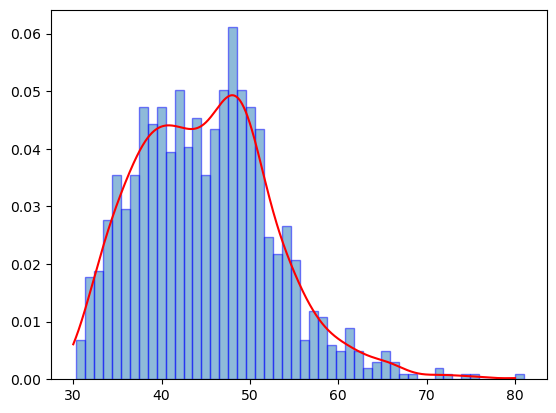

In [32]:
# KDE using Gaussian KDE
x = np.linspace(30, 80, N)
kde = sp.stats.gaussian_kde(Y)
plt.plot(x, kde(x), color='red')
plt.hist(Y, bins=50, density=True, alpha=0.5, edgecolor='blue')

### Morning Coffee

Suppose you pick up a coffee on your way to campus each trip.  From your experience, you know the following information: 
- the travel time from your home to the coffee shop is normally distributed with a mean of 15 minutes and variance of 2 minutes$^2$;
- the wait time to receive your coffee is exponentially distributed with a mean of 3 minutes;
- the travel time from the coffee shop to UBC campus is uniformly distributed over 5 to 10 minutes.

Construct a mathematical model to model the total travel time from your home to the coffee shop to UBC campus. Then form the resulting probability distribution function using Kernel Density Estimation. 

Be sure to follow the modelling process in your solution.

**Problem Statement**

Find the distribution of the total travel time from your home to the coffee shop to UBC Campus.

**Assumptions & Constraints**
- Travel time from home to coffee shop is normally distributed with known mean and variance
- Wait time for coffee is exponentially distributed with mean of 3
- Travel time from coffee to UBC is uniformly distributed over 5 to 10 minutes.

**Variables & Parameters**
- $X_1$, time from home to coffee shop, random variable
- $X_2$, time to wait for coffee
- $X_3$, time from coffee shop to UBC
- $Y$, total time of transit
- $\mu_1$, average time from home to coffee shop
- $\sigma_1^2$, variance in time from home to coffee shop
- $\mu_2$, average time of waiting for cofee

**Build Solutions**

(array([0.00210734, 0.00210734, 0.00632203, 0.0147514 , 0.02528811,
        0.03582483, 0.03371749, 0.04636154, 0.08429372, 0.0885084 ,
        0.09693777, 0.10536715, 0.10747449, 0.17069477, 0.07797169,
        0.13697729, 0.1327626 , 0.11168917, 0.12222589, 0.09904512,
        0.0885084 , 0.07164966, 0.073757  , 0.06322029, 0.03793217,
        0.04846889, 0.03161014, 0.02107343, 0.02107343, 0.02107343,
        0.01053671, 0.0295028 , 0.01053671, 0.01264406, 0.00421469,
        0.00210734, 0.0147514 , 0.00842937, 0.0147514 , 0.        ,
        0.        , 0.01053671, 0.        , 0.00210734, 0.00210734,
        0.        , 0.00210734, 0.        , 0.00210734, 0.00210734]),
 array([17.41951132, 17.89404255, 18.36857377, 18.84310499, 19.31763621,
        19.79216743, 20.26669865, 20.74122987, 21.21576109, 21.69029231,
        22.16482354, 22.63935476, 23.11388598, 23.5884172 , 24.06294842,
        24.53747964, 25.01201086, 25.48654208, 25.96107331, 26.43560453,
        26.91013575, 27.38

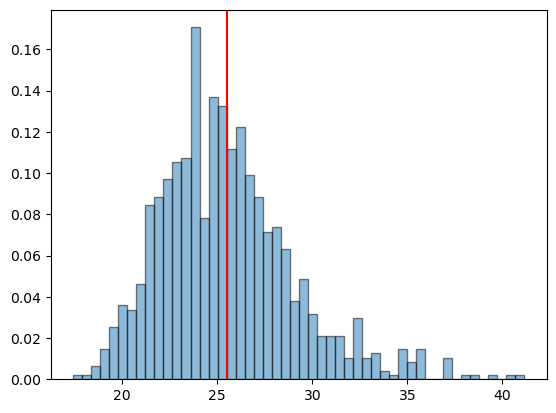

In [46]:
N = 1000
X1 = np.random.normal(loc=15, scale=np.sqrt(2), size=N)
X2 = np.random.exponential(scale=3, size=N)
X3 = np.random.uniform(low=5, high=10, size=N)
Y = X1 + X2 + X3

mu_Y = np.mean(Y)
plt.axvline(mu_Y, color='red')
plt.hist(Y, bins=50, density=True, alpha=0.5, edgecolor='black')

(array([0.00210734, 0.00210734, 0.00632203, 0.0147514 , 0.02528811,
        0.03582483, 0.03371749, 0.04636154, 0.08429372, 0.0885084 ,
        0.09693777, 0.10536715, 0.10747449, 0.17069477, 0.07797169,
        0.13697729, 0.1327626 , 0.11168917, 0.12222589, 0.09904512,
        0.0885084 , 0.07164966, 0.073757  , 0.06322029, 0.03793217,
        0.04846889, 0.03161014, 0.02107343, 0.02107343, 0.02107343,
        0.01053671, 0.0295028 , 0.01053671, 0.01264406, 0.00421469,
        0.00210734, 0.0147514 , 0.00842937, 0.0147514 , 0.        ,
        0.        , 0.01053671, 0.        , 0.00210734, 0.00210734,
        0.        , 0.00210734, 0.        , 0.00210734, 0.00210734]),
 array([17.41951132, 17.89404255, 18.36857377, 18.84310499, 19.31763621,
        19.79216743, 20.26669865, 20.74122987, 21.21576109, 21.69029231,
        22.16482354, 22.63935476, 23.11388598, 23.5884172 , 24.06294842,
        24.53747964, 25.01201086, 25.48654208, 25.96107331, 26.43560453,
        26.91013575, 27.38

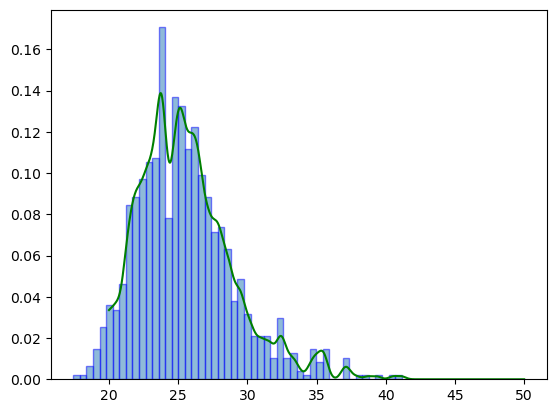

In [47]:
# Finding KDE, try Guassian first.
h = 0.3
x = np.linspace(20, 50, N)
K = lambda x: 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
fh = lambda x, h: 1/(N*h) * sum([K((x - Y[i])/h) for i in range(N)])

plt.plot(x, fh(x, h), color='green')
plt.hist(Y, bins=50, density=True, alpha=0.5, edgecolor='b')


(array([0.00210734, 0.00210734, 0.00632203, 0.0147514 , 0.02528811,
        0.03582483, 0.03371749, 0.04636154, 0.08429372, 0.0885084 ,
        0.09693777, 0.10536715, 0.10747449, 0.17069477, 0.07797169,
        0.13697729, 0.1327626 , 0.11168917, 0.12222589, 0.09904512,
        0.0885084 , 0.07164966, 0.073757  , 0.06322029, 0.03793217,
        0.04846889, 0.03161014, 0.02107343, 0.02107343, 0.02107343,
        0.01053671, 0.0295028 , 0.01053671, 0.01264406, 0.00421469,
        0.00210734, 0.0147514 , 0.00842937, 0.0147514 , 0.        ,
        0.        , 0.01053671, 0.        , 0.00210734, 0.00210734,
        0.        , 0.00210734, 0.        , 0.00210734, 0.00210734]),
 array([17.41951132, 17.89404255, 18.36857377, 18.84310499, 19.31763621,
        19.79216743, 20.26669865, 20.74122987, 21.21576109, 21.69029231,
        22.16482354, 22.63935476, 23.11388598, 23.5884172 , 24.06294842,
        24.53747964, 25.01201086, 25.48654208, 25.96107331, 26.43560453,
        26.91013575, 27.38

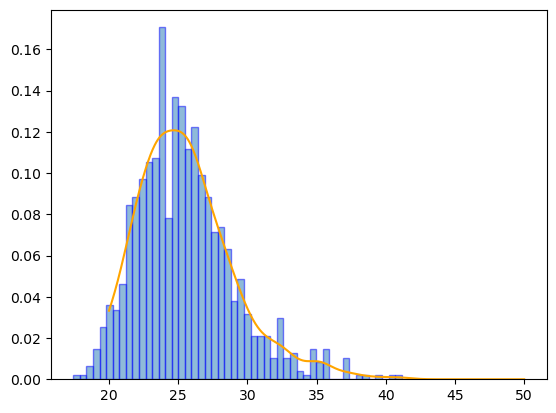

In [48]:
# trying with sp.stats
kde = sp.stats.gaussian_kde(Y)
plt.plot(x, kde(x), color='orange')
plt.hist(Y, bins=50, density=True, alpha=0.5, edgecolor='b')

### Insurance Claims

Suppose that insurance claims are processed using the following process:
- the time for a person to submit a claim is normally distributed with a mean of 5 days and variance of 2 days$^2$
- the time to process the claim is gamma distributed with a mean of 10 days and variance of 4 days$^2$
- the time to send the claim from the insurance agency to the claimee is exponentially distributed with a mean of 3 days.

Construct a mathematical model to model the total time to process an insurance claim.  Then form the resulting probability distirbution function using Kernel Density Estimation.

Be sure to follow the modelling process in your solution.

**Problem Statement**

Model the total time it takes for a person to have their claim processed. 

**Assumptions & Constraints**
- Time for person to submit a claim is normally distributed
- Time for a claim to be processed is gamma distributed
- Time for a claim to be returned to the claimee is exponentially distributed

**Variables & Parameters**
- $X_1$, time for person to submit a claim, random variable
- $X_2$, time for claim to be processed, random variable
- $X_3$, time for claim to be returned to claimee, random variable
- $\mu_1$, mean time for a person to submit a claim
- $\mu_2$, mean time for a claim to be processed
- $\mu_3$, mean time for a claim to be returned to claimee 
- $\sigma^2$, variance for time for a person to submit a claim
- $\sigma^2$, variance for time for a claim to be processed

**Build Solutions**

(array([0.0033189 , 0.0033189 , 0.0044252 , 0.0088504 , 0.01659449,
        0.01659449, 0.02323229, 0.02765748, 0.03208268, 0.04978347,
        0.05752757, 0.04093308, 0.05642127, 0.05531497, 0.05863387,
        0.06416536, 0.04203938, 0.04978347, 0.05863387, 0.05974017,
        0.05642127, 0.04425198, 0.03982678, 0.02765748, 0.02987008,
        0.03982678, 0.02212599, 0.02212599, 0.01438189, 0.01216929,
        0.01216929, 0.0088504 , 0.0077441 , 0.0055315 , 0.0066378 ,
        0.0033189 , 0.0088504 , 0.0022126 , 0.0022126 , 0.0022126 ,
        0.0011063 , 0.0011063 , 0.0011063 , 0.        , 0.0011063 ,
        0.0011063 , 0.        , 0.0022126 , 0.        , 0.0011063 ]),
 array([12.24341151, 13.14732595, 14.05124039, 14.95515484, 15.85906928,
        16.76298372, 17.66689816, 18.57081261, 19.47472705, 20.37864149,
        21.28255593, 22.18647038, 23.09038482, 23.99429926, 24.8982137 ,
        25.80212815, 26.70604259, 27.60995703, 28.51387147, 29.41778592,
        30.32170036, 31.22

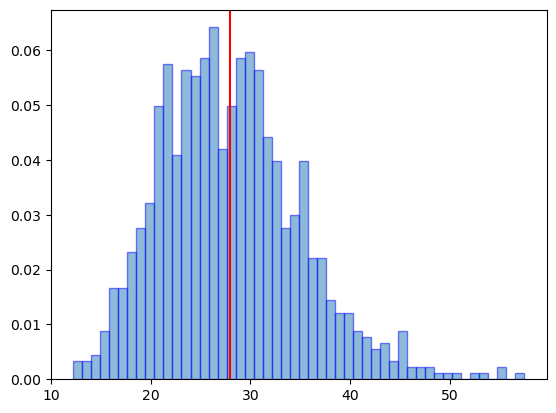

In [52]:
# Problem statement says to include time for a person to submit and receive claim
N = 1000
X1 = np.random.normal(5, np.sqrt(2), size=N)
X2 = np.random.gamma(10, np.sqrt(4), size=N)
X3 = np.random.exponential(3, size=N)
Y = X1 + X2 + X3

mu_Y = np.mean(Y)
plt.axvline(mu_Y, color='red')
plt.hist(Y, bins=50, density=True, alpha=0.5, edgecolor='b')


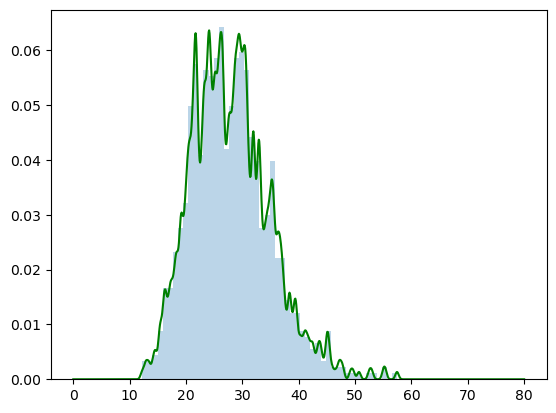

In [60]:
# building KDe, using an gaussian kernal
x = np.linspace(0, 80, N)
h = 0.3
K = lambda x: 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
fh = lambda x, h: 1/(N*h) * sum([K((x-Y[i])/h) for i in range(N)])

plt.hist(Y, bins=50, density=True, alpha=0.3)
plt.plot(x, fh(x,h), color='green')
plt.show()


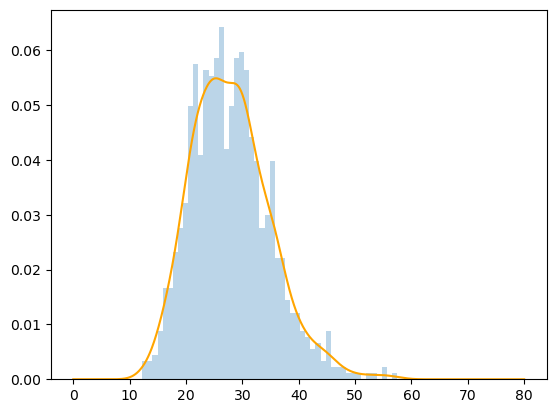

In [59]:
# Trying with sp.stats
kde = sp.stats.gaussian_kde(Y)
plt.hist(Y, bins=50, density=True, alpha=0.3)
plt.plot(x, kde(x), color='orange')